<a href="https://colab.research.google.com/github/sakaleshhubli/ML-Lab-25-26/blob/main/dummy_dataset_logistic_regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>


# Dummy Dataset Generation and Binary Classification
This notebook demonstrates:
- Generating a structured labeled dataset using.
- Train-test splitting (2-way split).
- Train-validation-test splitting (3-way split).
- K-Fold cross validation.
- Logistic Regression for binary classification.

In [3]:
pip install faker sdv

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.0/2.0 MB 31.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 186.8/186.8 kB 20.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 139.3/139.3 kB 14.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 14.0/14.0 MB 106.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 52.7/52.7 kB 5.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 74.3/74.3 kB 7.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 198.4/198.4 kB 19.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 85.7/85.7 kB 9.5 MB/s eta 0:00:00


In [22]:
import pandas as pd
import numpy as np
from faker import Faker
from sklearn.model_selection import train_test_split, KFold, cross_val_score
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

fake = Faker()


## Step 1: Generate Dummy Dataset

In [5]:
records = 5000
data = {
    'age': np.random.randint(18, 70, records),
    'income': np.random.randint(20000, 150000, records),
    'gender': np.random.choice(['M', 'F'], records),
    'city': [fake.city() for _ in range(records)],
    'purchased': np.random.choice([0,1], records, p=[0.6,0.4])
}

df = pd.DataFrame(data)
df.head()


,age,income,gender,city,purchased
0,58,28893,F,Lake Aarontown,0
1,57,105372,M,East John,0
2,40,116047,F,Lake Brent,0
3,56,129138,F,Morsefort,0
4,51,123979,F,Laurenchester,1


## Step 2: Encode Categorical Columns

In [6]:
df_encoded = pd.get_dummies(df, drop_first=True)
df_encoded.head()


,age,income,purchased,gender_M,city_Aaronmouth,city_Aaronside,city_Adamberg,city_Adamburgh,city_Adamhaven,city_Adamport,...,city_Youngtown,city_Youngview,city_Youngville,city_Yuside,city_Yvonnetown,city_Zacharyburgh,city_Zacharyfort,city_Zacharyhaven,city_Zacharyland,city_Zunigachester
0,58,28893,0,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1,57,105372,0,True,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2,40,116047,0,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
3,56,129138,0,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
4,51,123979,1,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


## Step 3: 2-Way Split (Train-Test)

In [18]:
X = df_encoded.drop('purchased', axis=1)
y = df_encoded['purchased']

In [19]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

model = LogisticRegression(max_iter=1000)
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
print('2-Way Split Accuracy:', accuracy_score(y_test, y_pred))

2-Way Split Accuracy: 0.595


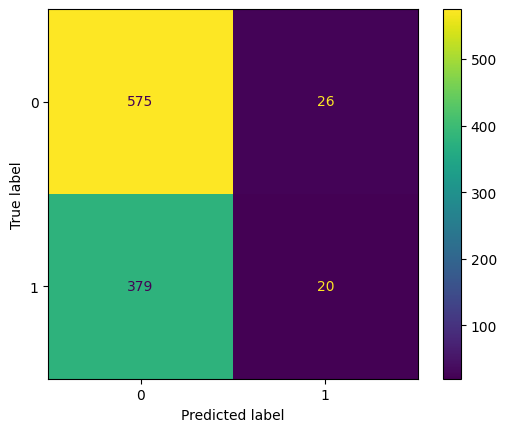

In [20]:
cm = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=model.classes_)
disp.plot()

## Step 4: 3-Way Split (Train-Validation-Test)

In [21]:

X_train, X_temp, y_train, y_temp = train_test_split(X, y, test_size=0.3, random_state=42)
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.5, random_state=42)

model = LogisticRegression(max_iter=1000)
model.fit(X_train, y_train)
val_pred = model.predict(X_val)
test_pred = model.predict(X_test)
print('Validation Accuracy:', accuracy_score(y_val, val_pred))
print('Test Accuracy:', accuracy_score(y_test, test_pred))


Validation Accuracy: 0.5973333333333334
Test Accuracy: 0.6066666666666667


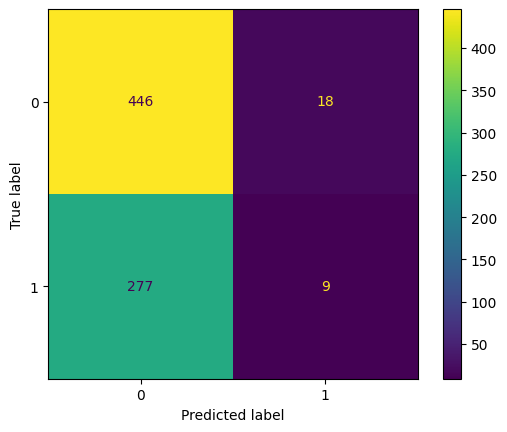

In [13]:
# Confusion Matrix
cm = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=model.classes_)
disp.plot()

## Step 5: K-Fold Cross Validation

In [27]:
kf = KFold(n_splits=5, shuffle=True, random_state=42)

all_y_true = []
all_y_pred = []

for train_index, test_index in kf.split(X):
    X_train, X_test = X.iloc[train_index], X.iloc[test_index]
    y_train, y_test = y.iloc[train_index], y.iloc[test_index]

    model = LogisticRegression(max_iter=1000)
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)

    all_y_true.extend(y_test)
    all_y_pred.extend(y_pred)

print("Overall Accuracy (K-Fold):", accuracy_score(all_y_true, all_y_pred))

Overall Accuracy (K-Fold): 0.6014


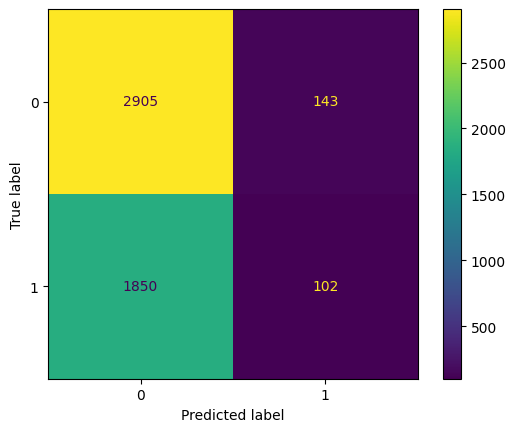

In [28]:
cm = confusion_matrix(all_y_true, all_y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=model.classes_)
disp.plot()